## Imports

In [ ]:
import os
import numpy as np
import tensorflow as tf
import keras
import itertools

from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from IPython.display import display
from keras.utils import array_to_img

from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
from numpy.random import seed
seed(888)

tf.random.set_seed(404)

## Constants

In [ ]:
NR_CLASSES = 10
LABEL_NAMES = [
    "Plane",
    "Car",
    "Bird",
    "Cat",
    "Deer",
    "Dog",
    "Frog",
    "Horse",
    "Ship",
    "Truck"
]

IMAGE_WIDTH = 32
IMAGE_HEIGHT = 32
IMAGE_PIXELS = IMAGE_WIDTH * IMAGE_HEIGHT
COLOR_CHANNELS = 3
TOTAL_INPUTS = IMAGE_PIXELS * COLOR_CHANNELS

TRAINING_SIZE = 40000
VALIDATION_SIZE = 10000

SMALL_TRAIN_SIZE = 1000

## Get the Data

In [ ]:
(x_train_all, y_train_all), (x_test, y_test) = cifar10.load_data()

## Explore the Data

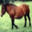

In [ ]:
pic = array_to_img(x_train_all[7])
display(pic)

In [ ]:
y_train_all[7][0]

7

In [ ]:
LABEL_NAMES[y_train_all[7][0]]

'Horse'

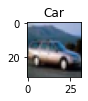

In [ ]:
plt.figure(figsize=(1,1))
plt.imshow(x_train_all[4])
plt.title(LABEL_NAMES[y_train_all[4][0]])
plt.show()

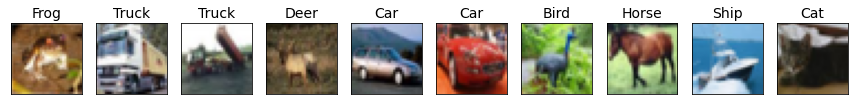

In [ ]:
# Viewing the first 10 images
plt.figure(figsize=(15, 5))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(x_train_all[i])
    plt.yticks([])
    plt.xticks([])
    plt.title(LABEL_NAMES[y_train_all[i][0]], fontsize=14)

plt.show()

In [ ]:
x_train_all.shape

(50000, 32, 32, 3)

In [ ]:
y_train_all.shape

(50000, 1)

In [ ]:
nr_images, x, y, c = x_train_all.shape
print(f"Images = {nr_images}\nWidth = {x}   | Height = {y}   | Channels = {c}")

Images = 50000
Width = 32   | Height = 32   | Channels = 3


In [ ]:
x_test.shape

(10000, 32, 32, 3)

In [ ]:
x_train_original = x_train_all

# Preprocess Data

In [ ]:
x_train_all[0][0][0][0]

59

In [ ]:
# scaling down the data and converting to float by dividing by 255.0
x_train_all, x_test = x_train_all/255.0, x_test/255.0

In [ ]:
x_train_all[0][0][0][0]

0.23137254901960785

In [ ]:
# Flatten the 4D array to a single dimension
x_train_all = x_train_all.reshape(len(x_train_all), 32*32*3)

In [ ]:
x_train_all.shape

(50000, 3072)

In [ ]:
x_test = x_test.reshape(len(x_test), 32*32*3)

In [ ]:
x_test.shape

(10000, 3072)

### Split training dataset into training and validation datasets  
### Around 60% training, 20% validation, 20% testing

In [ ]:
x_val = x_train_all[:VALIDATION_SIZE]
y_val = y_train_all[:VALIDATION_SIZE]

In [ ]:
x_train = x_train_all[VALIDATION_SIZE:]
y_train = y_train_all[VALIDATION_SIZE:]

In [ ]:
print(x_train.shape, x_val.shape)
print(y_train.shape, y_val.shape)

(40000, 3072) (10000, 3072)
(40000, 1) (10000, 1)


### Create a small dataset (for Illustration) before attempting to work with huge dataset

In [ ]:
x_train_xs = x_train[:SMALL_TRAIN_SIZE]
y_train_xs = y_train[:SMALL_TRAIN_SIZE]

# Define the Neural Network using Keras

In [ ]:
model_1 = Sequential([
    Dense(units=128, input_dim=TOTAL_INPUTS, activation="relu"),
    Dense(units=64, activation="relu"),
    Dense(16, activation="relu"),
    Dense(10, activation="softmax")
])
# A sequential model with 3 hidden layers an an output layer

In [ ]:
# model = Sequential([
#     Dense(units=4, input_dim=TOTAL_INPUTS, activation="relu"),
#     Dense(units=2, activation="softmax")
# ])

# Compile the Model

In [ ]:
model_1.compile(optimizer="adam", loss="sparse_categorical_crossentropy",
                metrics=["accuracy"])

In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               393344    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 16)                1040      
                                                                 
 dense_3 (Dense)             (None, 10)                170       
                                                                 
Total params: 402,810
Trainable params: 402,810
Non-trainable params: 0
_________________________________________________________________


In [ ]:
32*32*3*128 + 128

393344

In [ ]:
128*64 + 64

8256

In [ ]:
64*16 + 16

1040

In [ ]:
16*10 + 10

170

# Fit the Model

In [ ]:
samples_per_batch = 1000
nr_epochs = 150

In [ ]:
model_1.fit(x_train_xs, y_train_xs, 
            batch_size=samples_per_batch,
            epochs=nr_epochs,
            validation_data=(x_val, y_val))

Epoch 1/150
1/1 [==============================] - 6s 6s/step - loss: 2.4349 - accuracy: 0.0980 - val_loss: 2.4264 - val_accuracy: 0.0977
Epoch 2/150
1/1 [==============================] - 0s 182ms/step - loss: 2.4356 - accuracy: 0.0890 - val_loss: 2.3284 - val_accuracy: 0.0989
Epoch 3/150
1/1 [==============================] - 0s 122ms/step - loss: 2.3267 - accuracy: 0.1060 - val_loss: 2.3059 - val_accuracy: 0.0883
Epoch 4/150
1/1 [==============================] - 0s 107ms/step - loss: 2.3060 - accuracy: 0.0830 - val_loss: 2.3046 - val_accuracy: 0.1033
Epoch 5/150
1/1 [==============================] - 0s 123ms/step - loss: 2.2950 - accuracy: 0.0950 - val_loss: 2.3223 - val_accuracy: 0.1016
Epoch 6/150
1/1 [==============================] - 0s 103ms/step - loss: 2.3030 - accuracy: 0.0980 - val_loss: 2.2930 - val_accuracy: 0.1081
Epoch 7/150
1/1 [==============================] - 0s 178ms/step - loss: 2.2926 - accuracy: 0.0950 - val_loss: 2.2932 - val_accuracy: 0.1055
Epoch 8/150
1/1 

In [ ]:
#Nr of iterations = Nr of batches processed in one epoch

In [ ]:
# Methods to prevent overfitting -
# Early stop
# Dropout

In [ ]:
model_2 = Sequential([
    Dropout(0.2, seed=42, input_shape=(TOTAL_INPUTS,)),
    Dense(128, activation="relu", name="m2_hidden1"),
    Dense(64, activation="relu", name="m2_hidden2"),
    Dense(16, activation="relu", name="m2_hidden3"),
    Dense(10, activation="softmax", name="m2_out")
])

model_2.compile(optimizer="adam",
                loss="sparse_categorical_crossentropy",
                metrics=["accuracy"])

In [ ]:
model_2.fit(x_train_xs, y_train_xs, 
            batch_size=samples_per_batch,
            epochs=150,
            validation_data=(x_val, y_val))

Epoch 1/150
1/1 [==============================] - 2s 2s/step - loss: 2.3620 - accuracy: 0.1050 - val_loss: 2.3135 - val_accuracy: 0.0948
Epoch 2/150
1/1 [==============================] - 0s 204ms/step - loss: 2.3027 - accuracy: 0.1140 - val_loss: 2.3388 - val_accuracy: 0.1004
Epoch 3/150
1/1 [==============================] - 0s 114ms/step - loss: 2.3397 - accuracy: 0.0910 - val_loss: 2.3064 - val_accuracy: 0.1106
Epoch 4/150
1/1 [==============================] - 0s 200ms/step - loss: 2.3032 - accuracy: 0.1220 - val_loss: 2.2670 - val_accuracy: 0.1525
Epoch 5/150
1/1 [==============================] - 0s 189ms/step - loss: 2.2622 - accuracy: 0.1450 - val_loss: 2.2736 - val_accuracy: 0.1214
Epoch 6/150
1/1 [==============================] - 0s 186ms/step - loss: 2.2576 - accuracy: 0.1330 - val_loss: 2.2944 - val_accuracy: 0.1326
Epoch 7/150
1/1 [==============================] - 0s 137ms/step - loss: 2.2652 - accuracy: 0.1380 - val_loss: 2.2566 - val_accuracy: 0.1385
Epoch 8/150
1/1 

In [ ]:
model_3 = Sequential([
    Dropout(0.2, seed=42, input_shape=(TOTAL_INPUTS,)), #dropout for the input layer
    Dense(128, activation="relu", name="m3_hidden1"),
    Dropout(0.2, seed=42),    #dropout for the first hidden layer
    Dense(64, activation="relu", name="m3_hidden2"),
    Dense(16, activation="relu", name="m3_hiddne3"),
    Dense(10, activation="softmax", name="m3_out")
])

model_3.compile(optimizer="adam",
                loss="sparse_categorical_crossentropy",
                metrics=["accuracy"])

In [ ]:
model_3.fit(x_train, y_train,
            batch_size=samples_per_batch,
            epochs=1000,
            validation_data=(x_val, y_val))

Epoch 1/1000
40/40 [==============================] - 2s 22ms/step - loss: 2.2837 - accuracy: 0.1217 - val_loss: 2.2376 - val_accuracy: 0.1655
Epoch 2/1000
40/40 [==============================] - 0s 11ms/step - loss: 2.2017 - accuracy: 0.1682 - val_loss: 2.1692 - val_accuracy: 0.1768
Epoch 3/1000
40/40 [==============================] - 0s 11ms/step - loss: 2.1318 - accuracy: 0.1876 - val_loss: 2.0570 - val_accuracy: 0.2225
Epoch 4/1000
40/40 [==============================] - 0s 10ms/step - loss: 2.0480 - accuracy: 0.2237 - val_loss: 2.0008 - val_accuracy: 0.2550
Epoch 5/1000
40/40 [==============================] - 1s 13ms/step - loss: 1.9757 - accuracy: 0.2588 - val_loss: 1.9195 - val_accuracy: 0.2827
Epoch 6/1000
40/40 [==============================] - 0s 11ms/step - loss: 1.9176 - accuracy: 0.2835 - val_loss: 1.8665 - val_accuracy: 0.3061
Epoch 7/1000
40/40 [==============================] - 0s 11ms/step - loss: 1.8762 - accuracy: 0.3075 - val_loss: 1.8114 - val_accuracy: 0.3418

# Predictions on Individual Images

In [ ]:
for i in range(100):
  test_img = np.expand_dims(x_val[i], axis=0)
  predicted_val = np.argmax(model_3.predict(test_img)[0], axis=-1)
  predcited_class = LABEL_NAMES[predicted_val]
  # print(f"Actual value: {y_val[i][0]} | Predicted: {predicted_val}")
  display(array_to_img(x_train_original[i]))
  print(f"Prediction: {predcited_class}")

NameError: ignored

# Evaluation

In [ ]:
model_3.metrics_names

['loss', 'accuracy']

In [ ]:
test_loss, test_accuracy = model_3.evaluate(x_test, y_test)
print(f"Test loss: {test_loss: 0.3} . Test accuracy: {test_accuracy: 0.1%}")

313/313 [==============================] - 1s 3ms/step - loss: 1.3744 - accuracy: 0.5104
Test loss:  1.37 . Test accuracy:  51.0%


## Confusion Matrix

In [ ]:
predictions = np.argmax(model_3.predict(x_test), axis=-1)
conf_mat = confusion_matrix(y_true=y_test, y_pred=predictions)

313/313 [==============================] - 1s 3ms/step


In [ ]:
print(conf_mat.shape)
print(conf_mat.max())
print(conf_mat.min())

(10, 10)
689
6


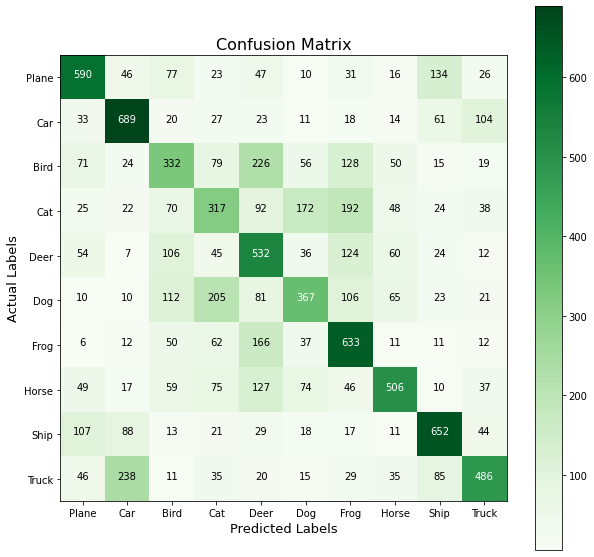

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(conf_mat, cmap="Greens")

plt.title("Confusion Matrix", fontsize=16)
plt.ylabel("Actual Labels", fontsize=13)
plt.xlabel("Predicted Labels", fontsize=13)

tick_marks = np.arange(NR_CLASSES)
plt.yticks(tick_marks, LABEL_NAMES)
plt.xticks(tick_marks, LABEL_NAMES)

plt.colorbar()

#Equivalent to Nested for loops, but itertools is computationally more efficient 
for i, j in itertools.product(range(conf_mat.shape[0]), range(conf_mat.shape[1])):
  plt.text(j, i, conf_mat[i][j], horizontalalignment="center",
           color="white" if conf_mat[i][j] > conf_mat.max()/2 else "black")
plt.show()

The diagonals represent correct predictions i.e, true positives  
Columns represent false positives for that item  
Rows represent false negatives for that item

In [ ]:
# True positives
true_positives = np.diag(conf_mat)
true_positives

array([590, 689, 332, 317, 532, 367, 633, 506, 652, 486])

In [ ]:
#recall
recall = true_positives/np.sum(conf_mat, axis=1)
recall

array([0.59 , 0.689, 0.332, 0.317, 0.532, 0.367, 0.633, 0.506, 0.652,
       0.486])

In [ ]:
# precision
precision = true_positives/np.sum(conf_mat, axis=0)
precision

array([0.59535822, 0.59757155, 0.39058824, 0.35658043, 0.39612807,
       0.46105528, 0.47809668, 0.62009804, 0.62752647, 0.60826033])

In [ ]:
avg_recall = np.mean(recall)
avg_precision = np.mean(precision)
print(f"Model_3 recall score: {avg_recall: 0.2%}")
print(f"Model_3 precision score: {avg_precision: 0.2%}")

Model_3 recall score:  51.04%
Model_3 precision score:  51.31%


In [ ]:
f1_score = 2*(avg_precision*avg_recall)/(avg_precision+avg_recall)
print(f"F-score: {f1_score: 0.2%}")

F-score:  51.18%
